In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

In [46]:
#Condiciones iniciales
v0 = 1
nu = 0.2
h = 0.02
R = v0*h/nu
#Limites de obstaculo
xMin, yMin = 5,5
xMax, yMax = 25,30
#Inicialización
N = 51
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)
u = np.zeros((N,N))
w = np.zeros((N,N))

In [78]:
#Obstaculo
def FronterasObstaculo(u,w):
    for i in range(xMin,xMax+1):
        w[i,yMax]= -2*(u[i,yMax+1] - u[i,yMax])/(h**2) #Arriba
        w[i,yMin] = -2*(u[i,yMax-1] - u[i,yMax])/(h**2) #Abajo
        u[i,yMin], u[i,yMax] = 0,0
    for j in range(yMin,yMax+1):
        u[xMin,j], u[xMax,j]=0,0    
        w[xMin,j]= -2*(u[xMin-1,j] - u[xMin,j])/(h**2) #Izquierda
        w[xMax,j] = -2*(u[xMax+1,j] - u[xMax,j])/(h**2) #Derecha

In [79]:
def Iniciar(u,w):
    for i in range(N):
        u[1,i] = u[0, i]#Izquierda
        u[-1,i] = u[-2,i] #Derecha
        u[i,-1] = u[i, -2] + v0*h*y[-1]#Arriba        
        u[i, 0] = 0#Abajo
        w[0,i] = 0 #Izquierda
        w[-1,i]=0#Derecha
        w[i,-1]=0 #Arriba
        w[i, 0] = 0 #Abajo    

In [100]:
def GetRelaxation(omega=0.8, Nit = int(2e3), tolerancia = 1e-5):
    for it in tqdm(range(Nit)):
        Iniciar(u,w)
        FronterasObstaculo(u,w)
        dmax1 = 0
        dmax2 = 0
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                if (xMax-1>i>xMin+1)and(yMax-1>j>yMin+1):
                    u[i,j], w[i,j] = 0,0
                    
                else:
                    ump = (1/4)*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1] + w[i,j]*h**2)
                    r_u = omega*(ump - u[i,j])
                    u[i,j]+=r_u
                    
                    if np.abs(r_u) > dmax1:
                        dmax1 = r_u                 
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                if (xMax-1>i>xMin+1) and (yMax-1>j>yMin+1):
                    u[i,j], w[i,j] = 0,0                    
                else:
                    wmp=(1/4)*(w[i,j+1]+w[i,j-1]+w[i-1,j]+w[i+1,j])-(R/16)*(u[i,j+1]-u[i,j-1])*(w[i+1,j]-w[i-1,j])+(R/16)*(w[i,j+1]-w[i,j-1])*(u[i+1,j]-u[i-1,j])
                    r_w = omega*(wmp-w[i,j])
                    w[i,j] += r_w
                    
                    if np.abs(r_w) > dmax2:
                        dmax2 = r_w     
        if (np.abs(dmax1) < tolerancia) and (np.abs(dmax2) < tolerancia):
            break
                
GetRelaxation()

100%|██████████| 2000/2000 [01:59<00:00, 16.80it/s]


<IPython.core.display.Javascript object>


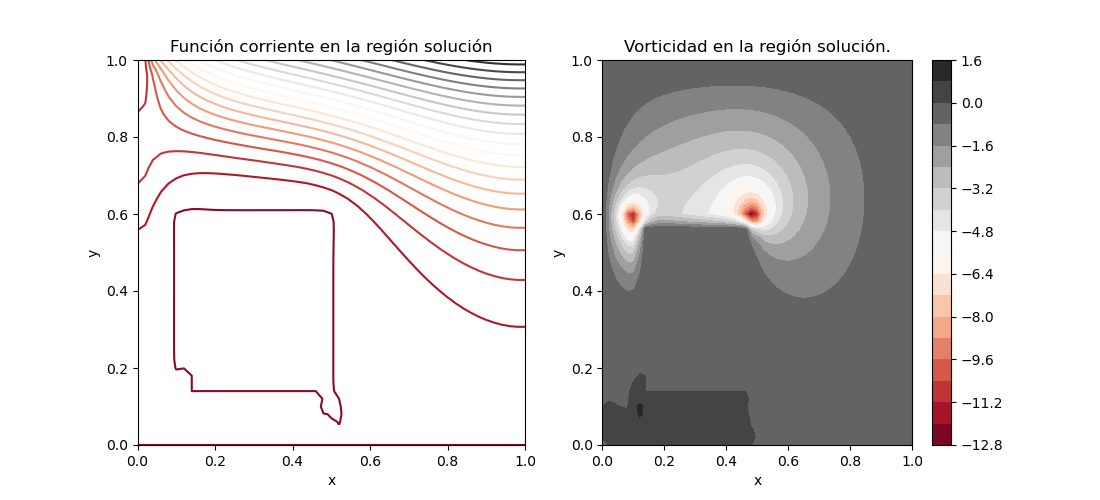

In [104]:
#Graficando las soluciones
fig= plt.figure(figsize=(11,5))
ax= fig.add_subplot(1,2,1)
ax.set_title("Función corriente en la región solución")
ax.set_xlabel("x")
ax.set_ylabel("y")
c=ax.contour(X,Y,u.T, 20, cmap = "RdGy")

ax1= fig.add_subplot(1,2,2)
ax1.set_title("Vorticidad en la región solución.")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
b=ax1.contourf(X,Y,w.T, 20, cmap = "RdGy")
fig.colorbar(b)

<IPython.core.display.Javascript object>


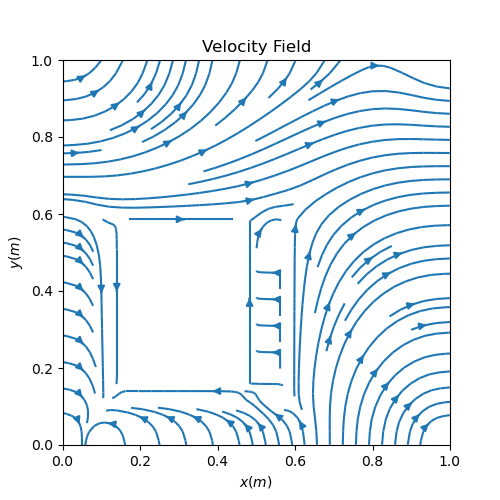

Text(0, 0.5, '$y (m)$')

In [103]:
#Cálculo del campo de velocidades por medio de la derivada central
vx = np.zeros((N,N))
vy = np.zeros((N,N))

for i in range(1,len(x)-1):
    for j in range(1,len(y)-1):
        vx[i,j] = (U[i+1,j]-U[i-1,j])/(2*h)
        vy[i,j] = (U[i,j+1]-U[i,j-1])/(2*h)
        
fig1 = plt.figure(figsize=(5,5))
ax2 = fig1.add_subplot(111)
ax2.set_title("Velocity Field")
ax2.streamplot(X,Y,vx,vy)
ax2.set_xlabel("$x (m)$")
ax2.set_ylabel("$y (m)$")